In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Oct 16 11:38:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let us pre-process the data
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mental Health/Mental-health-related-subreddits-modified.csv")
data.head(5)

,Content,Category,label
0,guys the civil war movies and games. keep givi...,schizophrenia,0
1,"What do I have? Hi everyone, I just found this...",anxiety,1
2,Buster from Arthur... A possibly random and we...,schizophrenia,0
3,anxiety attack at the movies I took about 50mg...,anxiety,1
4,Today’s reflections on depression I don’t know...,BPD,2


In [ ]:
data.shape

(275906, 3)

In [ ]:
# x = len(data)
# x = int((x/100) * 80) # dividing to consider 80% data
# print(x)

220724


In [ ]:
# data=data.sample(x)

In [ ]:
data.shape

(275906, 3)

In [ ]:
data.Category.value_counts()

anxiety          86132
depression       85994
bipolar          41052
BPD              38137
schizophrenia    17459
autism            7132
Name: Category, dtype: int64

# Data Preparation

In [ ]:
data['Subreddit'].replace(['mentalhealth'], ['other'], inplace=True)
data['Subreddit'].replace(['Anxiety'], ['anxiety'], inplace=True)

In [ ]:
data = data[data.Subreddit != 'other']

In [ ]:
data['Subreddit'].value_counts()

depression       258496
anxiety           86243
bipolar           41493
BPD               38216
schizophrenia     17506
autism             7142
Name: Subreddit, dtype: int64

In [ ]:
#merge data columns and rename the final column
data["Title"] = data["Title"] + " " + data["Text"]
data.drop('Text', inplace=True, axis=1)
data.rename(columns={"Title": "Content"}, inplace=True)
data.rename(columns={"Subreddit": "Category"}, inplace=True)
data = data[['Content', 'Category']]
data.head()

,Content,Category
0,exposure does not work! I have struggled with ...,anxiety
1,Panic attack? derealization? can't go to docto...,anxiety
2,How long can a panic attack last?! I've been w...,anxiety
3,"Stepping stones First time poster, long time l...",anxiety
4,"Coping with anxiety over climate change, on th...",anxiety


In [ ]:
data['Category'].value_counts()

depression       258496
anxiety           86243
bipolar           41493
BPD               38216
schizophrenia     17506
autism             7142
Name: Category, dtype: int64

In [ ]:
data.head(10)

,Content,Category
0,exposure does not work! I have struggled with ...,anxiety
1,Panic attack? derealization? can't go to docto...,anxiety
2,How long can a panic attack last?! I've been w...,anxiety
3,"Stepping stones First time poster, long time l...",anxiety
4,"Coping with anxiety over climate change, on th...",anxiety
5,I don't even know what I'm looking for by post...,anxiety
6,"Literally numb, not sure what to do. I'm (21, ...",anxiety
7,Lifetime anxiety 47M\n\nI've been anxious for ...,anxiety
8,went and saw the fireworks alone and finally f...,anxiety
9,Social anxiety help for NYE - I don't know any...,anxiety


In [ ]:
data = data.dropna()
data.shape

(449095, 2)

In [ ]:
data.Content.duplicated(keep="first").value_counts()

False    447894
True       1201
Name: Content, dtype: int64

In [ ]:
data.drop_duplicates(subset="Content",keep="first",inplace=True,ignore_index=True)
data.shape

(447894, 2)

In [ ]:
data['Category'].value_counts()

anxiety          86132
depression       85994
bipolar          41052
BPD              38137
schizophrenia    17459
autism            7132
Name: Category, dtype: int64

In [ ]:
data.head(15)

,Content,Category
0,exposure does not work! I have struggled with ...,anxiety
1,Panic attack? derealization? can't go to docto...,anxiety
2,How long can a panic attack last?! I've been w...,anxiety
3,"Stepping stones First time poster, long time l...",anxiety
4,"Coping with anxiety over climate change, on th...",anxiety
5,I don't even know what I'm looking for by post...,anxiety
6,"Literally numb, not sure what to do. I'm (21, ...",anxiety
7,Lifetime anxiety 47M\n\nI've been anxious for ...,anxiety
8,went and saw the fireworks alone and finally f...,anxiety
9,Social anxiety help for NYE - I don't know any...,anxiety


In [ ]:
data.Category.value_counts()

anxiety          86132
depression       85994
bipolar          41052
BPD              38137
schizophrenia    17459
autism            7132
Name: Category, dtype: int64

# Scaling down data

In [ ]:
temp_data = data[data.Category == 'depression']
temp_data.sample(15)

,Content,Category
182909,I just want a father I'm safe now but when I w...,depression
151550,"Tired of school, feel like a failure, and just...",depression
279634,Playing doctor. Has anyone bypassed the doctor...,depression
334947,life insurance question i think tonight on the...,depression
167290,Told my boyfriend about my depression Just som...,depression
210842,Some of my thoughts on various subjects. Opini...,depression
137467,"What's the point? Really though, life is meani...",depression
205151,I just had a major panic attack And I had nobo...,depression
273268,I don't know how everyone does it How do you a...,depression
247966,I watched coco today It just reminded me of ho...,depression


In [ ]:
temp_data.shape

(257982, 2)

In [ ]:
data.shape

(447894, 2)

In [ ]:
data = data[data.Category != 'depression']

In [ ]:
data.shape

(189912, 2)

In [ ]:
x = len(temp_data)
x = int(x/3) # considering one-third data
temp_data=temp_data.sample(x)

In [ ]:
temp_data.shape

(85994, 2)

In [ ]:
data = data.append(temp_data)
data.head(10)

,Content,Category
0,exposure does not work! I have struggled with ...,anxiety
1,Panic attack? derealization? can't go to docto...,anxiety
2,How long can a panic attack last?! I've been w...,anxiety
3,"Stepping stones First time poster, long time l...",anxiety
4,"Coping with anxiety over climate change, on th...",anxiety
5,I don't even know what I'm looking for by post...,anxiety
6,"Literally numb, not sure what to do. I'm (21, ...",anxiety
7,Lifetime anxiety 47M\n\nI've been anxious for ...,anxiety
8,went and saw the fireworks alone and finally f...,anxiety
9,Social anxiety help for NYE - I don't know any...,anxiety


In [ ]:
data.shape

(275906, 2)

In [ ]:
data = data.sample(n=len(data), ignore_index=True)

In [ ]:
data.shape

(275906, 2)

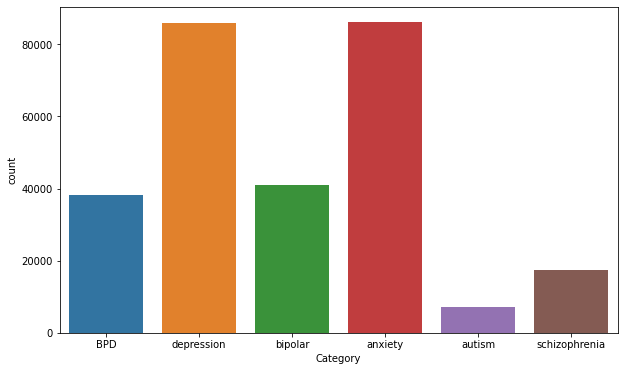

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Category', data=data)

# Data preparation again

In [ ]:
# data['label'] = data['Category']

In [ ]:
# data.head()

,Content,Category,label
0,guys the civil war movies and games. keep givi...,schizophrenia,0
1,"What do I have? Hi everyone, I just found this...",anxiety,1
2,Buster from Arthur... A possibly random and we...,schizophrenia,0
3,anxiety attack at the movies I took about 50mg...,anxiety,1
4,Today’s reflections on depression I don’t know...,BPD,2


In [ ]:
possible_labels = ['schizophrenia', 'anxiety', 'BPD', 'depression', 'bipolar',
       'autism']

In [ ]:
#possible_labels = data.Category.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'schizophrenia': 0,
 'anxiety': 1,
 'BPD': 2,
 'depression': 3,
 'bipolar': 4,
 'autism': 5}

['schizophrenia', 'anxiety', 'BPD', 'depression', 'bipolar',
       'autism']

In [ ]:
#data['label'].replace(possible_labels, [0, 1, 2, 3, 4, 5], inplace=True)

# Data Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import time
import re

ps = PorterStemmer()
stopwordSet = set(stopwords.words('english'))

t = time.time()

def leadMyWord(Content):
    Content = re.sub('[^a-zA-ZğĞüÜşŞıİöÖçÇ]'," ",Content)
    Content = Content.lower()
    Content = word_tokenize(Content,language='english')
    Content = [word for word in Content if not word in stopwordSet]
    Content = " ".join(Content)
    return Content   

textList = data.Content.apply(leadMyWord)
textList = list(textList)

In [ ]:
# #preparing y

# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

# le = LabelEncoder()
# labelEncode = le.fit_transform(data["Category"])
# print("LabelEncode")
# print(labelEncode)
# categorical_y = to_categorical(labelEncode)
# print("To_Categorical")
# print(categorical_y)

In [ ]:
from keras.preprocessing.text import one_hot
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

#preparing x for CNN
MAX_FEATURES = 10001

onehot_corpus = []
for text in textList:
    onehot_corpus.append(one_hot(text,MAX_FEATURES))
    
maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ", maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')

Max number of words :  3671


In [ ]:
X = padded_corpus
Y = data['label']

In [ ]:
# data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

MAX_FEATURES = 10001

def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(MAX_FEATURES, 100, input_length=maxTextLen))

    model.add(Conv1D(64, 5, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(128, 2, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(2))

    model.add(Flatten())

    model.add(Dense(units=64,activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(units=64,activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(units=6,activation="softmax"))
    
    # optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer='adam',metrics=["accuracy"],loss="categorical_crossentropy")
    return model

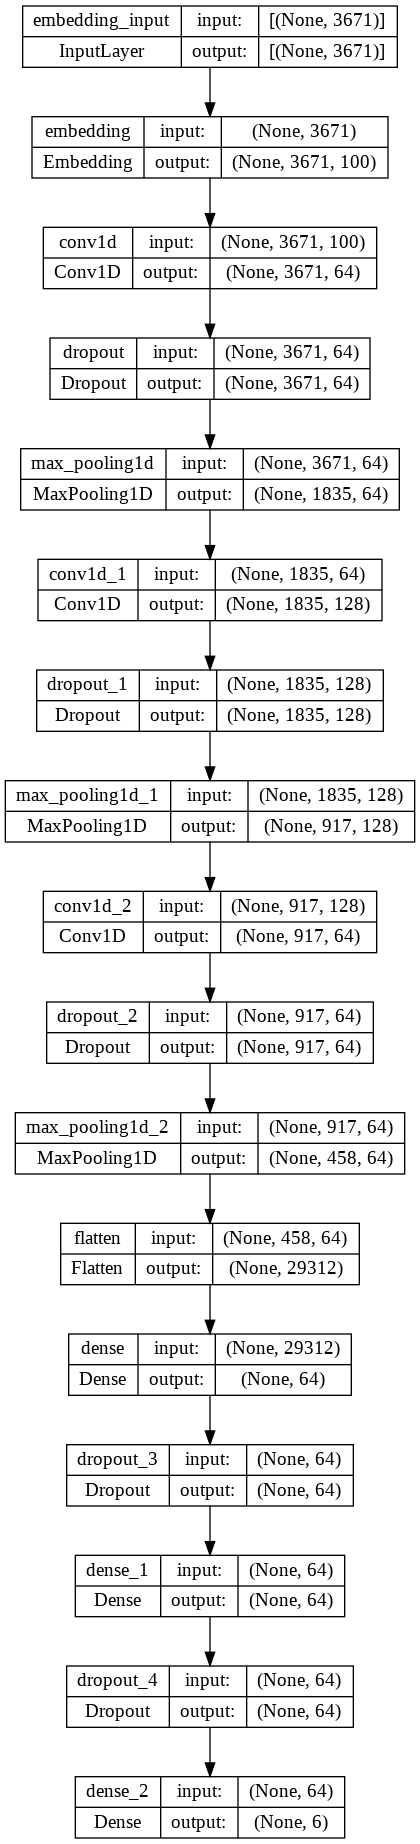

In [ ]:
model = build_cnn_model()
plot_model(model,show_shapes=True)

In [ ]:
# possible_labels = ['schizophrenia', 'anxiety', 'BPD', 'depression', 'bipolar',
#        'autism']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
def showResults(test, pred):
    print(classification_report(test, pred, target_names=possible_labels))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("F1-score : {}".format(f1Score))
    cm=confusion_matrix(test, pred)
    print(cm)
    print("\n")

# Fitting model with stratified k-fold cross validation

In [ ]:
from tensorflow.keras.utils import to_categorical
epochs=20
batch_size=512

skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(x_train, y_train)
foldNum=0
for train_index, val_index in skf.split(x_train, y_train):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # one hot encode
    Y_train = to_categorical(Y_train)
    Y_val = to_categorical(Y_val)
    
    history = model.fit(X_train, Y_train, 
                        validation_data = (X_val, Y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    y_predict = model.predict(X_val)

    #Converting one hot encoded test label to label    
    pred = np.argmax(y_predict, axis=1)
    val = np.argmax(Y_val, axis=1)
    
    showResults(val, pred)

Results for fold 1
Epoch 1/20
388/388 [==============================] - 188s 457ms/step - loss: 1.1490 - accuracy: 0.5546 - val_loss: 0.9050 - val_accuracy: 0.6506
Epoch 2/20
388/388 [==============================] - 178s 460ms/step - loss: 0.8793 - accuracy: 0.6898 - val_loss: 0.7465 - val_accuracy: 0.7507
Epoch 3/20
388/388 [==============================] - 178s 459ms/step - loss: 0.7448 - accuracy: 0.7618 - val_loss: 0.6846 - val_accuracy: 0.7758
Epoch 4/20
388/388 [==============================] - 177s 457ms/step - loss: 0.6691 - accuracy: 0.7918 - val_loss: 0.6649 - val_accuracy: 0.7794
Epoch 5/20
388/388 [==============================] - 176s 455ms/step - loss: 0.6128 - accuracy: 0.8110 - val_loss: 0.6639 - val_accuracy: 0.7793
Epoch 6/20
388/388 [==============================] - 176s 454ms/step - loss: 0.5655 - accuracy: 0.8279 - val_loss: 0.6691 - val_accuracy: 0.7790
Epoch 7/20
388/388 [==============================] - 176s 454ms/step - loss: 0.5190 - accuracy: 0.8419 -

In [ ]:
#exporting the trained model file
import pickle

with open ('/content/drive/MyDrive/Colab Notebooks/Mental Health/Final_k-fold_cnn_modified_pkl_file.pkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(9,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=10)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 10})
plt.show()

plt.figure(figsize=(9,6))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy', size=10)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 10})
plt.ylim((0.5,1))
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["Category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
cnn_accuracy = accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
#print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))
plt.subplots(figsize=(10,6))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()